# Import relavent libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [6]:
pip install numpy --upgrade --user

You should consider upgrading via the '/opt/nesi/CS400_centos7_bdw/Python/3.9.5-gimkl-2020a/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import glob
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [169]:
directory = '/nesi/nobackup/aut03802/dataset_sleep/sleep_classifiers/outputs/features'
features_csv = '/nesi/project/aut03802/Data/sleep_plus_features.csv'

In [170]:
import pandas as pd

# Define the data
data = {
    'ID': [13, 1, 3, 4, 5, 2, 6, 7, 8, 10, 9, 11, 12, 14, 15, 16],
    'Gender': ['MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE'],
    'HbA1c': [5.7, 5.5, 5.9, 6.4, 5.7, 5.6, 5.8, 5.3, 5.6, 6.0, 6.1, 6.0, 5.6, 5.5, 5.5, 5.5]
}

# Create the DataFrame
df = pd.DataFrame(data)

df

,ID,Gender,HbA1c
0,13,MALE,5.7
1,1,FEMALE,5.5
2,3,FEMALE,5.9
3,4,FEMALE,6.4
4,5,FEMALE,5.7
5,2,MALE,5.6
6,6,FEMALE,5.8
7,7,FEMALE,5.3
8,8,FEMALE,5.6
9,10,FEMALE,6.0


In [171]:
features_csv ='/nesi/project/aut03802/Data/features.csv'

In [5]:
features_data = pd.read_csv(features_csv)
features_data['Gender'].value_counts()

0    36855
Name: Gender, dtype: int64

In [135]:
features_data['PeakEDA_2hrsum'].value_counts()

0.0    28792
Name: PeakEDA_2hrsum, dtype: int64

In [4]:
import os 

In [5]:
# Function to calculate sleep stage counts
def calculate_sleep_stage_counts(file_path):
    sleep_data = pd.read_csv(file_path)
    stage_counts = sleep_data['psg_predicted'].value_counts().to_dict()
    return stage_counts

In [8]:
# Initialize a dictionary to hold sleep stage counts for each participant and night
sleep_stage_counts = {}

# Iterate through files and calculate sleep stage counts
for file in os.listdir(directory):
    if not file.startswith('participant') and not file.endswith('.out') and 'features' not in file and file.endswith('.csv'):
        path_file = os.path.join(directory, file)
        participant_id = file.split('_')[0]
        night = file.split('_')[2]
        counts = calculate_sleep_stage_counts(path_file)
        sleep_stage_counts[(participant_id, night)] = counts

In [15]:
sleep_stage_counts

{('013', '4'): {2.0: 381, 1.0: 253, 0.0: 153, 5.0: 51, 3.0: 8},
 ('010', '5'): {2.0: 286, 3.0: 193, 1.0: 182, 0.0: 144, 5.0: 90},
 ('002', '2'): {1.0: 486, 2.0: 199, 0.0: 100, 5.0: 90, 3.0: 60},
 ('015', '1'): {1.0: 370, 2.0: 301, 0.0: 132, 5.0: 61, 3.0: 54},
 ('002', '1'): {1.0: 391, 2.0: 233, 3.0: 131, 0.0: 94, 5.0: 75},
 ('002', '4'): {2.0: 283, 1.0: 255, 0.0: 139, 3.0: 125, 5.0: 115},
 ('004', '1'): {1.0: 240, 2.0: 184, 0.0: 100, 5.0: 65, 3.0: 51},
 ('011', '6'): {0.0: 295, 2.0: 214, 1.0: 213, 3.0: 100, 5.0: 97},
 ('009', '5'): {0.0: 225, 2.0: 208, 1.0: 203, 5.0: 97, 3.0: 60},
 ('012', '2'): {1.0: 319, 2.0: 284, 3.0: 123, 0.0: 118, 5.0: 102},
 ('003', '5'): {1.0: 81, 5.0: 49, 3.0: 27, 2.0: 27, 0.0: 20},
 ('005', '6'): {2.0: 348, 1.0: 241, 0.0: 182, 5.0: 51, 3.0: 28},
 ('005', '9'): {2.0: 290, 1.0: 216, 0.0: 149, 3.0: 125, 5.0: 94},
 ('006', '2'): {1.0: 432, 2.0: 214, 0.0: 127, 5.0: 45, 3.0: 22},
 ('004', '7'): {2.0: 381, 1.0: 235, 0.0: 200, 5.0: 76, 3.0: 19},
 ('014', '7'): {1.0: 3

In [41]:
def get_sleep_stage_counts(participant, night):
    if (participant,night) in sleep_stage_counts:
        return sleep_stage_counts[participant, night]
    else:
        
        return {2.0: 0, 1.0: 0, 0.0: 0, 5.0: 0, 3.0: 0}
        
    
    

In [42]:
get_sleep_stage_counts('003', '10')

{2.0: 0, 1.0: 0, 0.0: 0, 5.0: 0, 3.0: 0}

In [44]:
for index, row in features_data.iterrows():
    day_x = row['day_of_impact']
    participant_id = int(row['Participant'])
    participant_id = f'{participant_id:03}'
    #print(participant_id)
    
    counts = get_sleep_stage_counts(participant_id, str(day_x))
    #print(counts)
    if counts:
        for stage in range(6):  # Assuming there are 6 stages (adjust as per your data)
            col_name = f'stage_{stage}_count'
            features_data.at[index, col_name] = counts.get(stage, 0)
    else:
        # Handle case where no sleep stage counts found for this participant and day_x
        continue


In [1]:
features_data.to_csv('all_sleep.csv')

NameError: name 'features_data' is not defined

In [172]:
df_features=pd.read_csv('all_sleep.csv')
print("Total Data:",len(df_features))
print("Missing Data:",df_features.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_features)-df_features.isnull().any(axis=1).sum())

df_features.drop(['Unnamed: 0','Unnamed: 0.1','day_x','day_of_impact','day_y'],axis=1, inplace=True)

Total Data: 21765
Missing Data: 0
Actual Instances of Data: 21765


In [94]:
df_features['HbA1c']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21760    0.0
21761    0.0
21762    0.0
21763    0.0
21764    0.0
Name: HbA1c, Length: 21765, dtype: float64

In [100]:
df_features['Gender'].value_counts()

0.0    21765
Name: Gender, dtype: int64

In [101]:
df_features['Participant'].value_counts()

5.0     2254
8.0     2011
9.0     1921
10.0    1857
12.0    1834
13.0    1768
2.0     1721
11.0    1716
16.0    1663
6.0     1340
4.0     1234
14.0    1140
3.0     1022
15.0     284
Name: Participant, dtype: int64

In [173]:
df_features = df_features.merge(df[['ID', 'Gender']], left_on='Participant', right_on='ID', how='left')

In [67]:
df_features['Gender_y']

0        MALE
1        MALE
2        MALE
3        MALE
4        MALE
         ... 
21760    MALE
21761    MALE
21762    MALE
21763    MALE
21764    MALE
Name: Gender_y, Length: 21765, dtype: object

In [69]:
df_features['Gender_x']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21760    0.0
21761    0.0
21762    0.0
21763    0.0
21764    0.0
Name: Gender_x, Length: 21765, dtype: float64

In [174]:
df_features = df_features.merge(df[['ID', 'HbA1c']], left_on='Participant', right_on='ID', how='left')

In [175]:
df_features = df_features.drop('HbA1c_x', axis=1)

In [176]:
df_features = df_features.drop('Gender_x', axis=1)

In [177]:
df_features = df_features.drop('ID_x', axis=1)

In [178]:
df_features=df_features.drop('ID_y', axis=1)

In [179]:
df_features=df_features.rename(columns={"Gender_y": "Gender", "HbA1c_y": "HbA1c"})

In [180]:
zero_cols=['PeakEDA_2hrsum',
 'PeakEDA_2hrmean',
 'meanHRV',
 'calories8r',
 'WakeTime',
 'Wake_Time',
 'stage_4_count']
for col in zero_cols:
    df_features=df_features.drop(col, axis=1)
    

In [130]:
#df_features_IG=df_features.drop('IG',axis=1)

In [181]:
print("Total Data:",len(df_features))
print("Missing Data:",df_features.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_features)-df_features.isnull().any(axis=1).sum())

Total Data: 21765
Missing Data: 0
Actual Instances of Data: 21765


In [12]:
# Identify rows where all specified columns have a value of zero
zero_stages = (df_features[['stage_0_count', 'stage_1_count', 'stage_2_count', 
                            'stage_3_count', 'stage_4_count', 'stage_5_count']] == 0).all(axis=1)

# Display the number of rows that match the condition
print("Rows with all stage counts as zero:", zero_stages.sum())

Rows with all stage counts as zero: 1915


In [183]:
df_features

,Time,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,...,waso,sleep_onset_latency,number_wake_bouts,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,Gender,HbA1c
0,2020-07-17 00:03:24,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
1,2020-07-17 00:08:23,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
2,2020-07-17 00:13:24,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
3,2020-07-17 00:18:24,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
4,2020-07-17 00:23:24,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,2020-02-29 09:13:25,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,...,187.0,253.0,20.0,0.0,0.0,0.0,0.0,0.0,MALE,5.6
21761,2020-02-29 09:18:25,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,...,187.0,253.0,20.0,0.0,0.0,0.0,0.0,0.0,MALE,5.6
21762,2020-02-29 09:23:24,171.0,2.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,...,187.0,253.0,20.0,0.0,0.0,0.0,0.0,0.0,MALE,5.6
21763,2020-02-29 09:28:24,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,...,187.0,253.0,20.0,0.0,0.0,0.0,0.0,0.0,MALE,5.6


In [94]:
df_features['stage_4_count'].value_counts()

0.0    21765
Name: stage_4_count, dtype: int64

In [184]:
df_features = df_features.replace(0, np.nan)
df_features

,Time,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,...,waso,sleep_onset_latency,number_wake_bouts,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,Gender,HbA1c
0,2020-07-17 00:03:24,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
1,2020-07-17 00:08:23,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
2,2020-07-17 00:13:24,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
3,2020-07-17 00:18:24,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
4,2020-07-17 00:23:24,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,...,838.0,22.0,36.0,62.0,89.0,263.0,70.0,41.0,MALE,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,2020-02-29 09:13:25,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,...,187.0,253.0,20.0,NaN,NaN,NaN,NaN,NaN,MALE,5.6
21761,2020-02-29 09:18:25,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,...,187.0,253.0,20.0,NaN,NaN,NaN,NaN,NaN,MALE,5.6
21762,2020-02-29 09:23:24,171.0,2.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,...,187.0,253.0,20.0,NaN,NaN,NaN,NaN,NaN,MALE,5.6
21763,2020-02-29 09:28:24,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,...,187.0,253.0,20.0,NaN,NaN,NaN,NaN,NaN,MALE,5.6


In [185]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [186]:
# Separate numerical and non-numerical columns
numerical_cols = df_features.select_dtypes(include=[np.number]).columns
non_numerical_cols = df_features.select_dtypes(exclude=[np.number]).columns

# Replace all zero values with NaN in the numerical columns
df_features[numerical_cols] = df_features[numerical_cols].replace(0, np.nan)

In [187]:
numerical_cols

Index(['IG', 'Participant', 'HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G',
       'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G',
       'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G',
       'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G',
       'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G',
       'BVP_Q3G', 'PeakEDA', 'maxHRV', 'minHRV', 'medianHRV', 'SDNN', 'NN50',
       'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'Minfrommid', 'Hourfrommid',
       'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Mean', 'Std', 'Activity24'

In [188]:
non_numerical_cols

Index(['Time', 'Date', 'glucose_level', 'Gender'], dtype='object')

In [149]:
non_numerical_cols=['Time', 'Date', 'glucose_level', 'Gender']

In [189]:
imputed_values = imputer.fit_transform(df_features[numerical_cols])

/home/wsf4491/.local/Python-3.10-gimkl-2022a/lib/python3.10/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [190]:
imputed_values

array([[ 9.70000000e+01,  1.60000000e+01,  7.32256811e+01, ...,
         7.00000000e+01,  4.10000000e+01,  5.50000000e+00],
       [ 9.50000000e+01,  1.60000000e+01,  7.27582392e+01, ...,
         7.00000000e+01,  4.10000000e+01,  5.50000000e+00],
       [ 9.20000000e+01,  1.60000000e+01,  7.36999336e+01, ...,
         7.00000000e+01,  4.10000000e+01,  5.50000000e+00],
       ...,
       [ 1.71000000e+02,  2.00000000e+00,  8.46673754e+01, ...,
        -1.27985665e+12, -1.07845971e+11,  5.60000000e+00],
       [ 1.66000000e+02,  2.00000000e+00,  8.61736213e+01, ...,
         2.09815965e+12,  1.76799542e+11,  5.60000000e+00],
       [ 1.63000000e+02,  2.00000000e+00,  8.59706977e+01, ...,
         1.85163252e+12,  1.56026155e+11,  5.60000000e+00]])

In [19]:
list_cols=list(numerical_cols)
idx_list=[33,34,38,47,62,71,90]
new_list = [list_cols[i] for i in range(len(list_cols)) if i not in idx_list]
new_list

['IG',
 'Participant',
 'HR_Mean',
 'HR_Max',
 'HR_Std',
 'HR_Skew',
 'HR_Q1G',
 'HR_Q3G',
 'EDA_Mean',
 'EDA_Max',
 'EDA_Std',
 'EDA_Skew',
 'EDA_Q1G',
 'EDA_Q3G',
 'TEMP_Mean',
 'TEMP_Max',
 'TEMP_Std',
 'TEMP_Skew',
 'TEMP_Q1G',
 'TEMP_Q3G',
 'ACC_Mean',
 'ACC_Max',
 'ACC_Std',
 'ACC_Skew',
 'ACC_Q1G',
 'ACC_Q3G',
 'BVP_Mean',
 'BVP_Max',
 'BVP_Std',
 'BVP_Skew',
 'BVP_Q1G',
 'BVP_Q3G',
 'PeakEDA',
 'maxHRV',
 'minHRV',
 'medianHRV',
 'SDNN',
 'NN50',
 'pNN50',
 'RMSSD',
 'calories2hr',
 'protien2hr',
 'sugar2hr',
 'carbs2hr',
 'protien8hr',
 'sugar8hr',
 'carbs8hr',
 'calories24hr',
 'protien24hr',
 'sugar24hr',
 'carbs24hr',
 'Eat',
 'Eatcnt2hr',
 'Eatcnt8hr',
 'Eatcnt24hr',
 'Eatmean2hr',
 'Eatmean8hr',
 'Eatmean24hr',
 'Minfrommid',
 'Hourfrommid',
 'EDA_Min',
 'calories8hr',
 'TEMP_Min',
 'BVP_Min',
 'ACC_Min',
 'HR_Min',
 'HR_Mean_Historical',
 'HR_Std_Historical',
 'ACC_Mean_Historical',
 'ACC_Std_Historical',
 'Activity_Bouts',
 'Mean',
 'Std',
 'Activity24',
 'Activity1h',


In [128]:
old_list = [list_cols[i] for i in range(len(list_cols)) if i  in idx_list]
old_list

['PeakEDA_2hrsum',
 'PeakEDA_2hrmean',
 'meanHRV',
 'calories8r',
 'WakeTime',
 'Wake_Time',
 'stage_4_count']

In [132]:
df_features['PeakEDA_2hrsum']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21760   NaN
21761   NaN
21762   NaN
21763   NaN
21764   NaN
Name: PeakEDA_2hrsum, Length: 21765, dtype: float64

In [125]:
column_indices = [32, 33, 35, 36, 40, 49, 64, 73, 92]

# Get the column names
column_names = [df_features.columns[i] for i in idx_list]

In [126]:
column_names

['PeakEDA',
 'PeakEDA_2hrsum',
 'medianHRV',
 'carbs2hr',
 'Eatmean24hr',
 'HR_Min',
 'stage_1_count']

In [27]:
imputed_cols=list(set(numerical_cols)-set(column_names))

In [18]:
imputed_values

array([[ 9.70000000e+01,  1.60000000e+01,  7.32256811e+01, ...,
         2.63000000e+02,  7.00000000e+01,  4.10000000e+01],
       [ 9.50000000e+01,  1.60000000e+01,  7.27582392e+01, ...,
         2.63000000e+02,  7.00000000e+01,  4.10000000e+01],
       [ 9.20000000e+01,  1.60000000e+01,  7.36999336e+01, ...,
         2.63000000e+02,  7.00000000e+01,  4.10000000e+01],
       ...,
       [ 1.71000000e+02,  2.00000000e+00,  8.46673754e+01, ...,
         1.23944015e+09,  2.38553966e+09, -5.25332262e+09],
       [ 1.66000000e+02,  2.00000000e+00,  8.61736213e+01, ...,
         5.52856743e+09,  1.06411676e+10, -2.34339137e+10],
       [ 1.63000000e+02,  2.00000000e+00,  8.59706977e+01, ...,
        -1.31496385e+09, -2.53126924e+09,  5.57468176e+09]])

In [191]:
df_imputed_numerical = pd.DataFrame(imputed_values, columns=numerical_cols)
df_imputed_numerical

,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,...,percent_time_asleep,waso,sleep_onset_latency,number_wake_bouts,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,HbA1c
0,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,...,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5
1,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,...,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5
2,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,...,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5
3,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,...,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5
4,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,...,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,...,48.0,187.0,253.0,20.0,5.223788e+12,4.177862e+12,1.543889e+12,1.117674e+12,9.417980e+10,5.6
21761,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,...,48.0,187.0,253.0,20.0,5.651871e+12,4.520233e+12,1.670409e+12,1.209266e+12,1.018977e+11,5.6
21762,171.0,2.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,0.866359,...,48.0,187.0,253.0,20.0,-5.981797e+12,-4.784100e+12,-1.767918e+12,-1.279857e+12,-1.078460e+11,5.6
21763,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,...,48.0,187.0,253.0,20.0,9.806384e+12,7.842915e+12,2.898273e+12,2.098160e+12,1.767995e+11,5.6


In [192]:
df_imputed = pd.concat([df_imputed_numerical,df_features[non_numerical_cols].reset_index(drop=True)],axis=1)

In [193]:
df_imputed

,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,...,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,HbA1c,Time,Date,glucose_level,Gender
0,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:03:24,2020-07-17,Normal,MALE
1,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:08:23,2020-07-17,Normal,MALE
2,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:13:24,2020-07-17,Normal,MALE
3,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:18:24,2020-07-17,Low,MALE
4,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:23:24,2020-07-17,Low,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,...,5.223788e+12,4.177862e+12,1.543889e+12,1.117674e+12,9.417980e+10,5.6,2020-02-29 09:13:25,2020-02-29,High,MALE
21761,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,...,5.651871e+12,4.520233e+12,1.670409e+12,1.209266e+12,1.018977e+11,5.6,2020-02-29 09:18:25,2020-02-29,High,MALE
21762,171.0,2.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,0.866359,...,-5.981797e+12,-4.784100e+12,-1.767918e+12,-1.279857e+12,-1.078460e+11,5.6,2020-02-29 09:23:24,2020-02-29,High,MALE
21763,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,...,9.806384e+12,7.842915e+12,2.898273e+12,2.098160e+12,1.767995e+11,5.6,2020-02-29 09:28:24,2020-02-29,Normal,MALE


In [194]:
df_imputed.to_csv('imputed.csv')

In [4]:
df_imputed = pd.read_csv('imputed.csv')

In [5]:
df_imputed.columns

Index(['Unnamed: 0', 'IG', 'Participant', 'HR_Mean', 'HR_Max', 'HR_Std',
       'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std',
       'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std',
       'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std',
       'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std',
       'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'PeakEDA', 'maxHRV', 'minHRV',
       'medianHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD', 'calories2hr',
       'protien2hr', 'sugar2hr', 'carbs2hr', 'protien8hr', 'sugar8hr',
       'carbs8hr', 'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr',
       'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr',
       'Eatmean8hr', 'Eatmean24hr', 'Minfrommid', 'Hourfrommid', 'EDA_Min',
       'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Mean'

In [6]:
df_imputed.drop(['Unnamed: 0'],axis=1, inplace=True)

In [7]:
categorical_features=['Participant','Gender']

sleep_features= ['total_sleep_time', 'percent_time_asleep', 'waso',
       'sleep_onset_latency', 'number_wake_bouts', 'stage_0_count',
       'stage_1_count', 'stage_2_count', 'stage_3_count', 'stage_5_count']
other_features=['HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G',
       'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G',
       'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G',
       'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G',
       'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G',
       'BVP_Q3G', 'PeakEDA', 'maxHRV', 'minHRV', 'medianHRV', 'SDNN', 'NN50',
       'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'Minfrommid', 'Hourfrommid',
       'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min',
       'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical',
       'ACC_Std_Historical', 'Activity_Bouts', 'Activity24',
       'Activity1h']
numeric_features=sleep_features+other_features



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

It is important to carry out the imputation to make the data more complete. 


In [6]:
for categories in categorical_features:
    one_hot = pd.get_dummies(df_imputed[categories])
    df_imputed = df_imputed.drop(categories,axis = 1)
    df_imputed = df_imputed.join(one_hot)

In [7]:
df_imputed.columns


Index([      'IG',  'HR_Mean',   'HR_Max',   'HR_Std',  'HR_Skew',   'HR_Q1G',
         'HR_Q3G', 'EDA_Mean',  'EDA_Max',  'EDA_Std',
       ...
              9.0,       10.0,       11.0,       12.0,       13.0,       14.0,
             15.0,       16.0,   'FEMALE',     'MALE'],
      dtype='object', length=104)

In [32]:
X = df_imputed.drop([ 'Time','IG', 'Date', 'Mean', 'Std','glucose_level'], axis=1)
y = df_imputed['IG']



In [33]:
y

0         97.0
1         95.0
2         92.0
3         89.0
4         90.0
         ...  
21756    174.0
21760    181.0
21761    177.0
21763    166.0
21764    163.0
Name: IG, Length: 20369, dtype: float64

In [113]:
y = y.map({'Low': 0, 'Normal': 1, 'High': 2})

In [86]:
y

0        1
1        1
2        1
3        0
4        0
        ..
21760    2
21761    2
21762    2
21763    1
21764    1
Name: glucose_level, Length: 21765, dtype: int64

In [44]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,booster='gbtree',
                          alpha= 2.1582604452883043e-06, subsample= 0.7964068192491254,
                          colsample_bytree=0.9717438348841921,max_depth=9,min_child_weight=5,eta=0.6593033094128061,
                          gamma= 0.0001224964179463803,grow_policy="depthwise")

In [199]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features=
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [58]:
y

0        1
1        1
2        1
3        0
4        0
        ..
21760    2
21761    2
21762    2
21763    1
21764    1
Name: glucose_level, Length: 21765, dtype: int64

In [59]:
 xgb_model.fit(X_train,y_train)

XGBClassifier(alpha=2.1582604452883043e-06, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9717438348841921, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6593033094128061, eval_metric=None, feature_types=None,
              gamma=0.0001224964179463803, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

In [48]:
y

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21760   NaN
21761   NaN
21762   NaN
21763   NaN
21764   NaN
Name: glucose_level, Length: 21765, dtype: float64

In [60]:
y_pred = xgb_model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [62]:
classification_rep = classification_report(y_test, y_pred)

In [63]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.59      0.69       554
           1       0.87      0.96      0.91      3177
           2       0.85      0.63      0.73       622

    accuracy                           0.87      4353
   macro avg       0.85      0.73      0.78      4353
weighted avg       0.86      0.87      0.86      4353



In [34]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LassoCV, Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import friedmanchisquare
from sklearn.model_selection import KFold

In [35]:
# Define models
models = {
    'DT': DecisionTreeRegressor(),
    'SVM': SVR(),
    'RF': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'LassoCV': LassoCV(),
    'Ridge': Ridge(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBOOST': XGBRegressor()
}

In [36]:
X.columns = X.columns.astype(str)

In [203]:
y

0         97.0
1         95.0
2         92.0
3         89.0
4         90.0
         ...  
21760    181.0
21761    177.0
21762    171.0
21763    166.0
21764    163.0
Name: IG, Length: 21765, dtype: float64

In [37]:

# Initialize performance metric lists
results = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'model :{name}')
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        r2 = r2_score(y_test, y_pred)
        n, p = X_test.shape
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        msle = mean_squared_error(y_test, y_pred, squared=False)
        ev = explained_variance_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f'mae :{mae}')
        print(f'mape:{mape}')
        print(f'r2:{r2}')
        print(f'adj_r2:{adj_r2}')
        print(f'msle:{msle}')
        print(f'ev:{ev}')
        print(f'rmse:{rmse}')
        
        
        
        
        results.append({
            'Model': name,
            'Fold': fold,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2,
            'Adjusted R2': adj_r2,
            'MSLE': msle,
            'Explained Variance': ev,
            'RMSE': rmse
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('model_performance_metrics_regression.csv', index=False)

print("Model performance metrics have been saved to 'model_performance_metrics.csv'.")

# Calculate mean and standard deviation for each metric for each model
mean_metrics = results_df.groupby('Model').mean()
std_metrics = results_df.groupby('Model').std()

# Display the mean performance metrics for each model
print("\nMean performance metrics for each model:")
print(mean_metrics)



model :DT


ValueError: could not convert string to float: 'MALE'

In [ ]:
import os
results_df=pd.read_csv('model_performance_metrics_regression(all_features).csv')

In [ ]:
print("\nMean performance metrics for each model:")
mean_metrics

In [10]:
X = df_imputed.drop([ 'Time','IG', 'Date', 'Mean', 'Std','glucose_level','total_sleep_time', 'percent_time_asleep', 'waso',
       'sleep_onset_latency', 'number_wake_bouts', 'stage_0_count',
       'stage_1_count', 'stage_2_count', 'stage_3_count', 'stage_5_count'], axis=1)
y = df_imputed['IG']


In [11]:
scaler = StandardScaler()
X[other_features] = scaler.fit_transform(X[other_features])

In [14]:
X.columns = X.columns.astype(str)

In [15]:
# Initialize performance metric lists
results = []

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'model :{name}')
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        r2 = r2_score(y_test, y_pred)
        n, p = X_test.shape
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        msle = mean_squared_error(y_test, y_pred, squared=False)
        ev = explained_variance_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f'mae :{mae}')
        print(f'mape:{mape}')
        print(f'r2:{r2}')
        print(f'adj_r2:{adj_r2}')
        print(f'msle:{msle}')
        print(f'ev:{ev}')
        print(f'rmse:{rmse}')
        
        
        
        
        results.append({
            'Model': name,
            'Fold': fold,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2,
            'Adjusted R2': adj_r2,
            'MSLE': msle,
            'Explained Variance': ev,
            'RMSE': rmse
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('model_performance_metrics_regression.csv', index=False)

print("Model performance metrics have been saved to 'model_performance_metrics.csv'.")

# Calculate mean and standard deviation for each metric for each model
mean_metrics = results_df.groupby('Model').mean()
std_metrics = results_df.groupby('Model').std()

# Display the mean performance metrics for each model
print("\nMean performance metrics for each model:")
print(mean_metrics)



model :DT
mae :7.532384014699128
mape:6.342484640947116
r2:0.6270453674216278
adj_r2:0.6113269729451447
msle:14.269181981904413
ev:0.6275011950500597
rmse:14.269181981904413
mae :7.290767110702802
mape:6.314999006946151
r2:0.6483135505992328
adj_r2:0.6334915163333001
msle:13.033119184682207
ev:0.6493017343674994
rmse:13.033119184682207
mae :6.894809370693615
mape:5.894203362749308
r2:0.6717428971352412
adj_r2:0.6579083065930482
msle:12.703899697499022
ev:0.6717692924304405
rmse:12.703899697499022
mae :7.028020211299954
mape:6.076055493083691
r2:0.6742448778528789
adj_r2:0.6605157347738815
msle:12.97550782818049
ev:0.6744495186328858
rmse:12.97550782818049
mae :7.385852090032154
mape:6.3189336613099165
r2:0.6626143509942061
adj_r2:0.648395032453732
msle:13.073605271698536
ev:0.662617800062514
rmse:13.073605271698536
mae :6.828584558823529
mape:5.8773985957082875
r2:0.6856081283867006
adj_r2:0.6723515473124455
msle:12.755063152701823
ev:0.6856481115338913
rmse:12.755063152701823
mae :7.3

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [ ]:
import os
results_df=pd.read_csv('model_performance_metrics_regression(other_features).csv')

In [ ]:
print("\nMean performance metrics for each model:")
mean_metrics

In [7]:
import matplotlib.pyplot as plt

In [7]:
df_imputed

,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,...,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,HbA1c,Time,Date,glucose_level,Gender
0,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:03:24,2020-07-17,Normal,MALE
1,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:08:23,2020-07-17,Normal,MALE
2,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:13:24,2020-07-17,Normal,MALE
3,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:18:24,2020-07-17,Low,MALE
4,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,...,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,5.5,2020-07-17 00:23:24,2020-07-17,Low,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,...,5.223788e+12,4.177862e+12,1.543889e+12,1.117674e+12,9.417980e+10,5.6,2020-02-29 09:13:25,2020-02-29,High,MALE
21761,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,...,5.651871e+12,4.520233e+12,1.670409e+12,1.209266e+12,1.018977e+11,5.6,2020-02-29 09:18:25,2020-02-29,High,MALE
21762,171.0,2.0,84.667375,87.22,1.835218,-0.553606,83.805195,85.447387,0.511280,0.866359,...,-5.981797e+12,-4.784100e+12,-1.767918e+12,-1.279857e+12,-1.078460e+11,5.6,2020-02-29 09:23:24,2020-02-29,High,MALE
21763,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,...,9.806384e+12,7.842915e+12,2.898273e+12,2.098160e+12,1.767995e+11,5.6,2020-02-29 09:28:24,2020-02-29,Normal,MALE


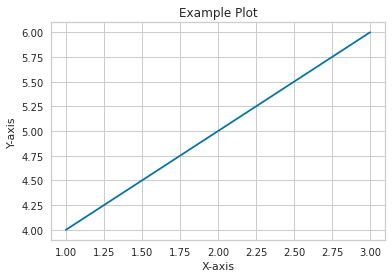

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set default font to DejaVu Sans
rcParams['font.sans-serif'] = ['DejaVu Sans']

# Alternatively, you can use another available font on your system
# rcParams['font.sans-serif'] = ['Helvetica']

# Plot your data
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('Example Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

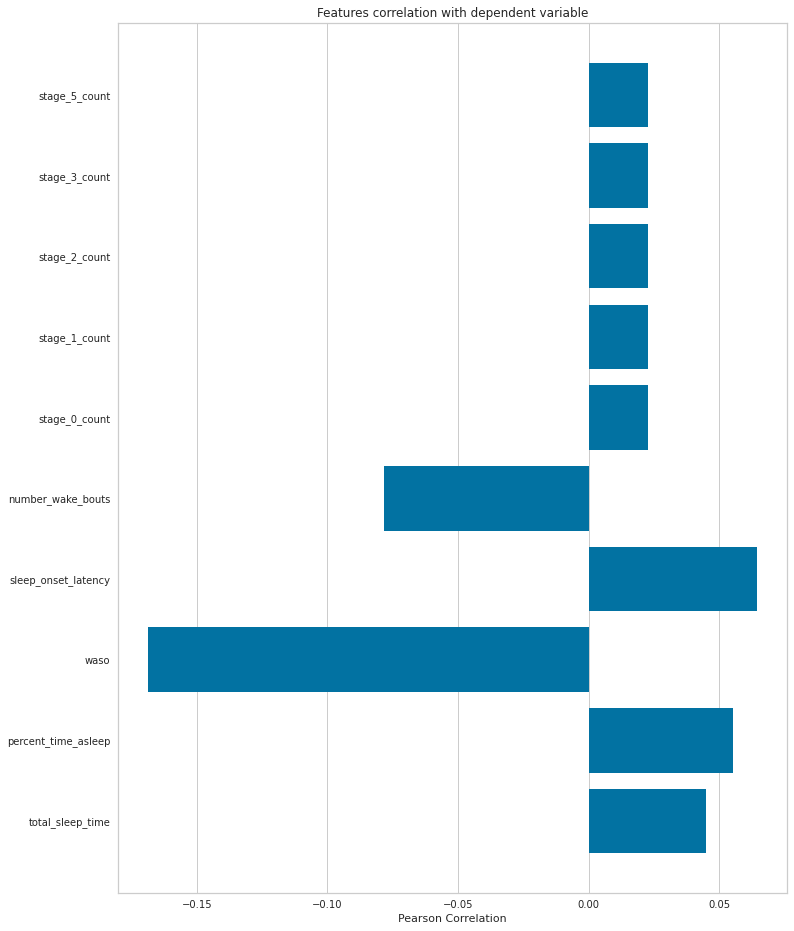

In [11]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(12, 16))
visualizer = FeatureCorrelation(labels=sleep_features)
visualizer.fit(df_imputed[sleep_features], df_imputed['IG'])
visualizer.show(outpath="feature_correlation.svg")
plt.show()

In [20]:
from scipy.stats import skew

In [14]:
df_imputed['total_sleep_time_log'] = np.log(df_imputed['total_sleep_time'])

/home/wsf4491/.local/Python-3.10-gimkl-2022a/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df_imputed['percent_time_asleep_log'] = np.log(df_imputed['percent_time_asleep'])

In [16]:
df_imputed['stage_0_count_log'] = np.log(df_imputed['stage_0_count'])

/home/wsf4491/.local/Python-3.10-gimkl-2022a/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
sleep_features.append('stage_0_count_log')

In [18]:
sleep_features.append('percent_time_asleep_log')
sleep_features.append('total_sleep_time_log')

In [19]:
df_imputed[sleep_features]

,total_sleep_time,percent_time_asleep,waso,sleep_onset_latency,number_wake_bouts,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,stage_0_count_log,percent_time_asleep_log,total_sleep_time_log
0,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
1,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
2,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
3,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
4,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21760,403.0,48.0,187.0,253.0,20.0,5.223788e+12,4.177862e+12,1.543889e+12,1.117674e+12,9.417980e+10,29.284244,3.871201,5.998937
21761,403.0,48.0,187.0,253.0,20.0,5.651871e+12,4.520233e+12,1.670409e+12,1.209266e+12,1.018977e+11,29.363008,3.871201,5.998937
21762,403.0,48.0,187.0,253.0,20.0,-5.981797e+12,-4.784100e+12,-1.767918e+12,-1.279857e+12,-1.078460e+11,NaN,3.871201,5.998937
21763,403.0,48.0,187.0,253.0,20.0,9.806384e+12,7.842915e+12,2.898273e+12,2.098160e+12,1.767995e+11,29.914055,3.871201,5.998937


In [20]:
print("Total Data:",len(df_imputed))
print("Missing Data:",df_imputed.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_imputed)-df_imputed.isnull().any(axis=1).sum())

Total Data: 21765
Missing Data: 1396
Actual Instances of Data: 20369


In [21]:
df_imputed=df_imputed.dropna()

In [22]:
print("Total Data:",len(df_imputed))
print("Missing Data:",df_imputed.isnull().any(axis=1).sum())
print("Actual Instances of Data:",len(df_imputed)-df_imputed.isnull().any(axis=1).sum())

Total Data: 20369
Missing Data: 0
Actual Instances of Data: 20369


In [18]:
sleep_features

['total_sleep_time',
 'percent_time_asleep',
 'waso',
 'sleep_onset_latency',
 'number_wake_bouts',
 'stage_0_count',
 'stage_1_count',
 'stage_2_count',
 'stage_3_count',
 'stage_5_count',
 'stage_0_count_log',
 'percent_time_asleep_log',
 'total_sleep_time_log']

In [19]:
df_imputed[sleep_features]

,total_sleep_time,percent_time_asleep,waso,sleep_onset_latency,number_wake_bouts,stage_0_count,stage_1_count,stage_2_count,stage_3_count,stage_5_count,stage_0_count_log,percent_time_asleep_log,total_sleep_time_log
0,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
1,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
2,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
3,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
4,579.0,40.0,838.0,22.0,36.0,6.200000e+01,8.900000e+01,2.630000e+02,7.000000e+01,4.100000e+01,4.127134,3.688879,6.361302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,403.0,48.0,187.0,253.0,20.0,3.334921e+12,2.667192e+12,9.856348e+11,7.135349e+11,6.012538e+10,28.835470,3.871201,5.998937
21760,403.0,48.0,187.0,253.0,20.0,5.223788e+12,4.177862e+12,1.543889e+12,1.117674e+12,9.417980e+10,29.284244,3.871201,5.998937
21761,403.0,48.0,187.0,253.0,20.0,5.651871e+12,4.520233e+12,1.670409e+12,1.209266e+12,1.018977e+11,29.363008,3.871201,5.998937
21763,403.0,48.0,187.0,253.0,20.0,9.806384e+12,7.842915e+12,2.898273e+12,2.098160e+12,1.767995e+11,29.914055,3.871201,5.998937


In [60]:
sleep_features=['total_sleep_time',
 'percent_time_asleep',
 'waso',
 'sleep_onset_latency',
 'number_wake_bouts',
 'stage_0_count',
 'stage_1_count',
 'stage_2_count',
 'stage_3_count',
 'stage_5_count',
 'stage_0_count_log',
 'percent_time_asleep_log',
 'total_sleep_time_log',
 'percent_time_asleep_log',
 'total_sleep_time_log']

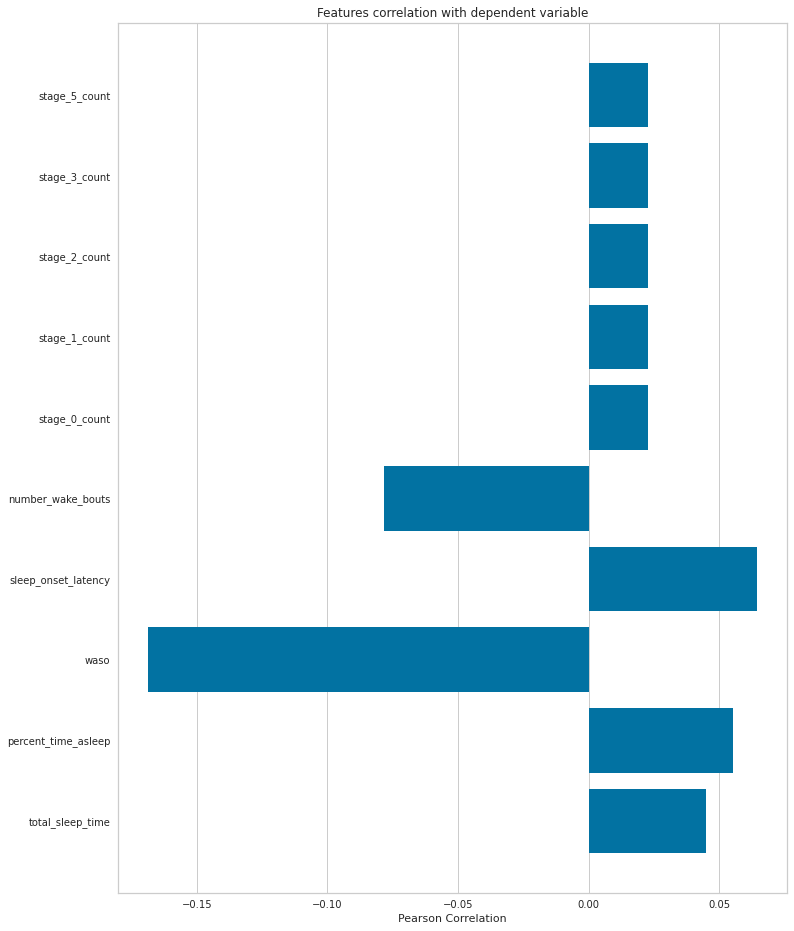

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [12]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(12, 16))
visualizer = FeatureCorrelation(labels=sleep_features)
visualizer.fit(df_imputed[sleep_features], df_imputed['IG'])
visualizer.show()

In [ ]:
sleep_features=['total_sleep_time',
 'percent_time_asleep',
 'waso',
 'sleep_onset_latency',
 'number_wake_bouts',
 'stage_0_count',
 'stage_1_count',
 'stage_2_count',
 'stage_3_count',
 'stage_5_count',
 'stage_0_count_log',
 'percent_time_asleep_log',
 'total_sleep_time_log',
 'percent_time_asleep_log',
 'total_sleep_time_log']

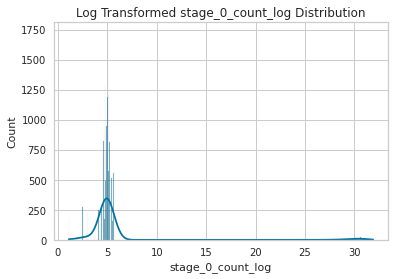

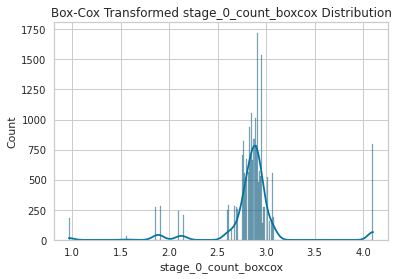

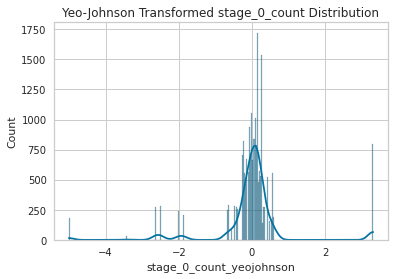

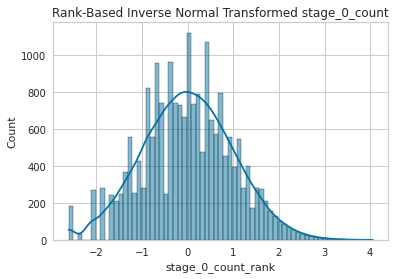

MemoryError: Unable to allocate 107. TiB for an array with shape (14715876027564,) and data type float64

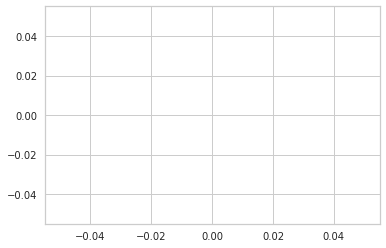

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, shapiro, rankdata, norm
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'HR_Std' is a non-normal feature
df= df_imputed
"""
# Original Data
sns.histplot(df['stage_0_count'], kde=True)
plt.title('Original stage_0_count Distribution')
plt.show()
"""
# Log Transformation
df['stage_0_count_log'] = np.log(df['stage_0_count'] + 1)
sns.histplot(df['stage_0_count_log'], kde=True)
plt.title('Log Transformed stage_0_count_log Distribution')
plt.show()

# Box-Cox Transformation
df['stage_0_count_boxcox'], _ = boxcox(df['stage_0_count'] + 1)
sns.histplot(df['stage_0_count_boxcox'], kde=True)
plt.title('Box-Cox Transformed stage_0_count_boxcox Distribution')
plt.show()

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['stage_0_count_yeojohnson'] = pt.fit_transform(df[['stage_0_count']])
sns.histplot(df['stage_0_count_yeojohnson'], kde=True)
plt.title('Yeo-Johnson Transformed stage_0_count Distribution')
plt.show()

# Rank-Based Inverse Normal Transformation
ranks = rankdata(df['stage_0_count'])
df['stage_0_count_rank'] = norm.ppf((ranks - 0.5) / len(ranks))
sns.histplot(df['stage_0_count_rank'], kde=True)
plt.title('Rank-Based Inverse Normal Transformed stage_0_count')
plt.show()

# Standardization
scaler = StandardScaler()
df['stage_0_count_standardized'] = scaler.fit_transform(df[['stage_0_count']])
sns.histplot(df['stage_0_count_standardized'], kde=True)
plt.title('Standardized stage_0_count Distribution')
plt.show()

# Re-evaluate normality using Shapiro-Wilk test
_, p_value_original = shapiro(df['stage_0_count'])
_, p_value_log = shapiro(df['stage_0_count_log'])
_, p_value_boxcox = shapiro(df['stage_0_count_boxcox'])
_, p_value_yeojohnson = shapiro(df['stage_0_count_yeojohnson'])
_, p_value_rank = shapiro(df['stage_0_count_rank'])
_, p_value_standardized = shapiro(df['stage_0_count'])

print(f'Original: p-value = {p_value_original}')
print(f'Log: p-value = {p_value_log}')
print(f'Box-Cox: p-value = {p_value_boxcox}')
print(f'Yeo-Johnson: p-value = {p_value_yeojohnson}')
print(f'Rank-Based Inverse Normal: p-value = {p_value_rank}')
print(f'Standardized: p-value = {p_value_standardized}')

In [24]:
df

,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,EDA_Max,...,glucose_level,Gender,total_sleep_time_log,percent_time_asleep_log,stage_0_count_log,total_sleep_time_boxcox,HR_Std_yeojohnson,total_sleep_time_rank,total_sleep_time_standardized,total_sleep_time_yeojohnson
0,97.0,16.0,73.225681,73.57,0.234825,-0.862047,73.108174,73.313689,0.301333,0.334533,...,Normal,MALE,6.363028,3.688879,4.127134,32.989376,-1.854988,-0.020245,-0.047577,0.067502
1,95.0,16.0,72.758239,73.57,0.351658,0.620606,72.608911,72.921836,0.359451,0.394727,...,Normal,MALE,6.363028,3.688879,4.127134,32.989376,-1.732922,-0.020245,-0.047577,0.067502
2,92.0,16.0,73.699934,75.07,0.628637,-0.038853,73.416714,73.968872,0.423380,0.458762,...,Normal,MALE,6.363028,3.688879,4.127134,32.989376,-1.482199,-0.020245,-0.047577,0.067502
3,89.0,16.0,73.565316,77.47,2.043241,0.121869,72.647048,74.517301,0.481480,1.456508,...,Low,MALE,6.363028,3.688879,4.127134,32.989376,-0.650880,-0.020245,-0.047577,0.067502
4,90.0,16.0,75.144385,80.30,2.978029,0.467569,73.879337,76.672485,1.854490,5.904090,...,Low,MALE,6.363028,3.688879,4.127134,32.989376,-0.299151,-0.020245,-0.047577,0.067502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,174.0,2.0,83.044585,87.05,1.797977,0.482883,82.291102,83.831879,0.570997,0.596047,...,High,MALE,6.001415,3.871201,28.835470,27.942060,-0.761763,-1.170405,-0.318091,-0.531718
21760,181.0,2.0,85.898538,88.55,1.808236,-0.842159,84.978402,86.595798,0.530921,0.566582,...,High,MALE,6.001415,3.871201,29.284244,27.942060,-0.756928,-1.170405,-0.318091,-0.531718
21761,177.0,2.0,82.445449,86.57,2.433794,-0.729108,81.244232,83.365709,0.515155,0.538398,...,High,MALE,6.001415,3.871201,29.363008,27.942060,-0.492006,-1.170405,-0.318091,-0.531718
21763,166.0,2.0,86.173621,87.45,0.689601,-1.170720,85.873365,86.427853,0.509617,0.516619,...,Normal,MALE,6.001415,3.871201,29.914055,27.942060,-1.432926,-1.170405,-0.318091,-0.531718


In [24]:
sleep_features.append('total_sleep_time_rank')
sleep_features.append('total_sleep_time_standardized')
sleep_features.append('total_sleep_time_yeojohnson')
sleep_features.append('total_sleep_time_boxcox')

In [30]:
sleep_features.append('stage_0_count_rank')
sleep_features.append('stage_0_count_standardized')
sleep_features.append('stage_0_count_yeojohnson')
sleep_features.append('stage_0_count_boxcox')

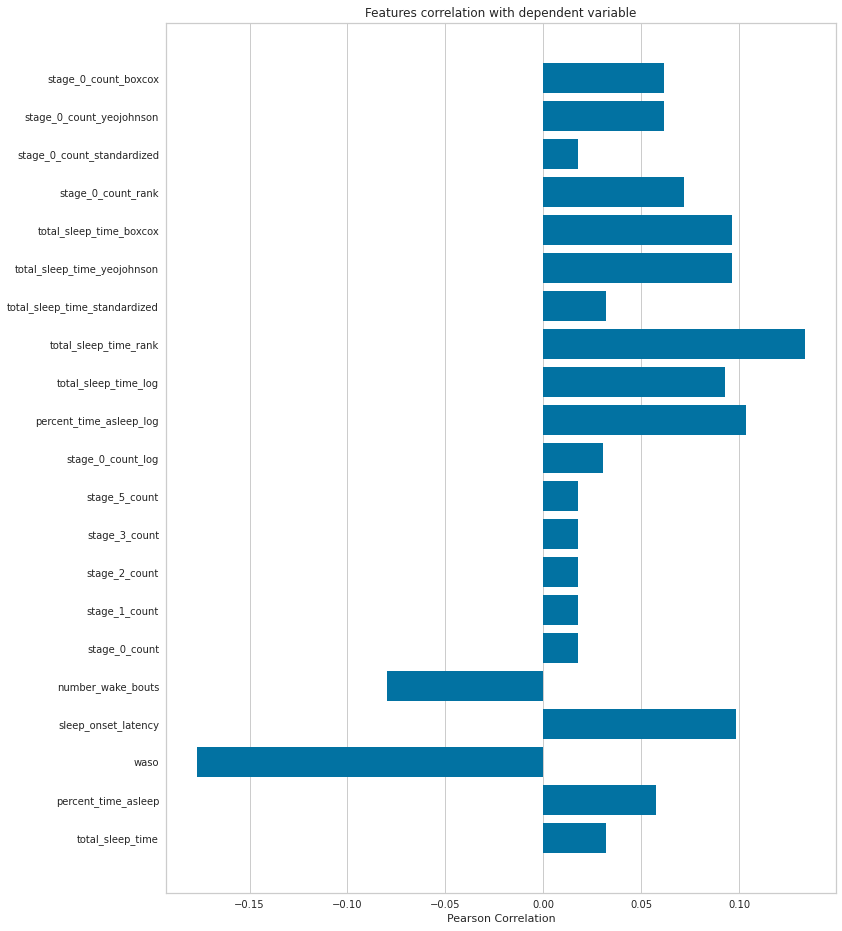

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [31]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(12, 16))
visualizer = FeatureCorrelation(labels=sleep_features)
visualizer.fit(df_imputed[sleep_features], df_imputed['IG'])
visualizer.show()

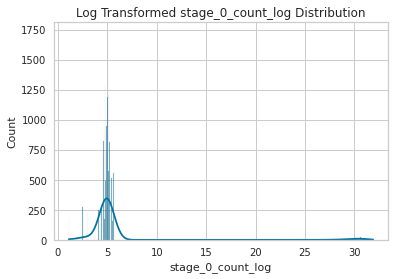

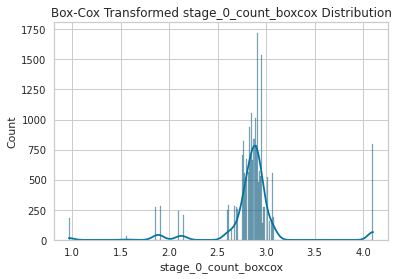

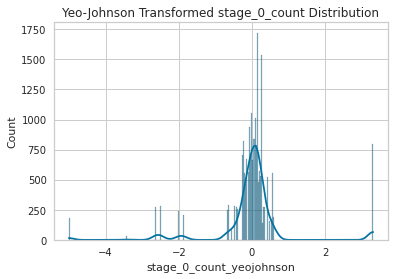

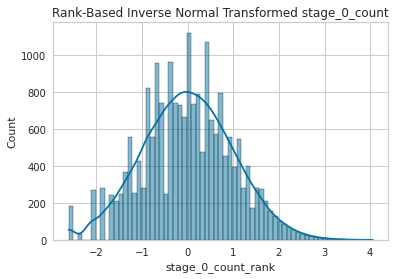

MemoryError: Unable to allocate 107. TiB for an array with shape (14715876027564,) and data type float64

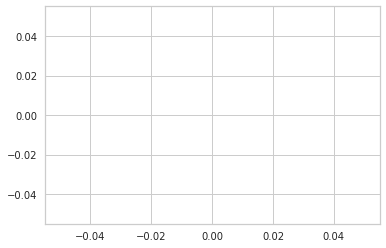

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, shapiro, rankdata, norm
from sklearn.preprocessing import PowerTransformer, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'HR_Std' is a non-normal feature
df= df_imputed
"""
# Original Data
sns.histplot(df['stage_0_count'], kde=True)
plt.title('Original stage_0_count Distribution')
plt.show()
"""
# Log Transformation
df['stage_0_count_log'] = np.log(df['stage_0_count'] + 1)
sns.histplot(df['stage_0_count_log'], kde=True)
plt.title('Log Transformed stage_0_count_log Distribution')
plt.show()

# Box-Cox Transformation
df['stage_0_count_boxcox'], _ = boxcox(df['stage_0_count'] + 1)
sns.histplot(df['stage_0_count_boxcox'], kde=True)
plt.title('Box-Cox Transformed stage_0_count_boxcox Distribution')
plt.show()

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df['stage_0_count_yeojohnson'] = pt.fit_transform(df[['stage_0_count']])
sns.histplot(df['stage_0_count_yeojohnson'], kde=True)
plt.title('Yeo-Johnson Transformed stage_0_count Distribution')
plt.show()

# Rank-Based Inverse Normal Transformation
ranks = rankdata(df['stage_0_count'])
df['stage_0_count_rank'] = norm.ppf((ranks - 0.5) / len(ranks))
sns.histplot(df['stage_0_count_rank'], kde=True)
plt.title('Rank-Based Inverse Normal Transformed stage_0_count')
plt.show()

# Standardization
scaler = StandardScaler()
df['stage_0_count_standardized'] = scaler.fit_transform(df[['stage_0_count']])
sns.histplot(df['stage_0_count_standardized'], kde=True)
plt.title('Standardized stage_0_count Distribution')
plt.show()

# Re-evaluate normality using Shapiro-Wilk test
_, p_value_original = shapiro(df['stage_0_count'])
_, p_value_log = shapiro(df['stage_0_count_log'])
_, p_value_boxcox = shapiro(df['stage_0_count_boxcox'])
_, p_value_yeojohnson = shapiro(df['stage_0_count_yeojohnson'])
_, p_value_rank = shapiro(df['stage_0_count_rank'])
_, p_value_standardized = shapiro(df['stage_0_count'])

print(f'Original: p-value = {p_value_original}')
print(f'Log: p-value = {p_value_log}')
print(f'Box-Cox: p-value = {p_value_boxcox}')
print(f'Yeo-Johnson: p-value = {p_value_yeojohnson}')
print(f'Rank-Based Inverse Normal: p-value = {p_value_rank}')
print(f'Standardized: p-value = {p_value_standardized}')

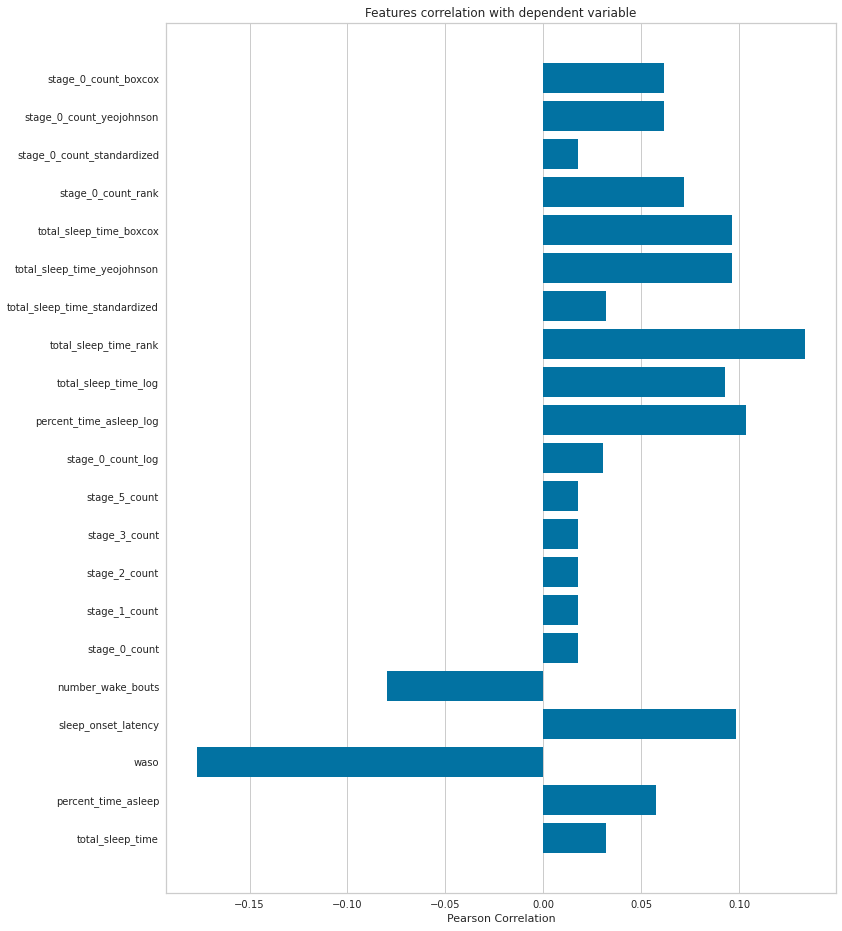

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [31]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(12, 16))
visualizer = FeatureCorrelation(labels=sleep_features)
visualizer.fit(df_imputed[sleep_features], df_imputed['IG'])
visualizer.show()

total_sleep_time_log, rank based inverse normal transformed total_sleep_time, percent_time_asleep_log,rank based inverse normal transformed percent_time_asleep, waso, rank based inverse sleep_onset_latency, number_wake_bouts, rank based inverse normal stage_0_count, ank based inverse normal stage_1_count,ank based inverse normal stage_2_count, yeo-johnson transformed stage 3, yeo-johnson transformed stage 5

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('data_compiled.csv')

In [7]:
for col in  df.columns:
    print(col)
    

Unnamed: 0
IG
HR_Mean
HR_Max
HR_Std
HR_Skew
HR_Q1G
HR_Q3G
EDA_Mean
EDA_Max
EDA_Std
EDA_Skew
EDA_Q1G
EDA_Q3G
TEMP_Mean
TEMP_Max
TEMP_Std
TEMP_Skew
TEMP_Q1G
TEMP_Q3G
ACC_Mean
ACC_Max
ACC_Std
ACC_Skew
ACC_Q1G
ACC_Q3G
BVP_Mean
BVP_Max
BVP_Std
BVP_Skew
BVP_Q1G
BVP_Q3G
PeakEDA
maxHRV
minHRV
medianHRV
SDNN
NN50
pNN50
RMSSD
calories2hr
protien2hr
sugar2hr
carbs2hr
protien8hr
sugar8hr
carbs8hr
calories24hr
protien24hr
sugar24hr
carbs24hr
Eat
Eatcnt2hr
Eatcnt8hr
Eatcnt24hr
Eatmean2hr
Eatmean8hr
Eatmean24hr
Minfrommid
Hourfrommid
EDA_Min
calories8hr
TEMP_Min
BVP_Min
ACC_Min
HR_Min
HR_Mean_Historical
HR_Std_Historical
ACC_Mean_Historical
ACC_Std_Historical
Activity_Bouts
Mean
Std
Activity24
Activity1h
total_sleep_time
percent_time_asleep
waso
sleep_onset_latency
number_wake_bouts
stage_0_count
stage_1_count
stage_2_count
stage_3_count
stage_5_count
HbA1c
Time
Date
glucose_level
2.0
3.0
4.0
5.0
6.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
FEMALE
MALE
stage_0_count_log
total_sleep_time_log
percent

In [9]:
df['glucose_level']

0        Normal
1        Normal
2        Normal
3           Low
4           Low
          ...  
20364      High
20365      High
20366      High
20367    Normal
20368    Normal
Name: glucose_level, Length: 20369, dtype: object